## Titanic Project

#### Phân tích dữ liệu Titanic
Tập dữ liệu **titanic.csv** chứa thông tin về hành khách trên tàu Titanic với ý nghĩa các cột như sau:
1.	PassengerId: ID của mỗi hành khách.
2.	Survived: cho biết hành khách còn sống sót (1) hay không (0).
3.	Pclass: Hạng vé của hành khách (1 = Hạng nhất, 2 = Hạng hai, 3 = Hạng ba).
4.	Name: Tên đầy đủ của hành khách.
5.	Sex: Giới tính của hành khách.
6.	Age: Tuổi của hành khách.
7.	SibSp: Số lượng anh chị em hoặc vợ/chồng đi cùng trên tàu.
8.	Parch: Số lượng cha mẹ hoặc con cái đi cùng trên tàu.
9.	Ticket: Mã số vé.
10.	Fare: Giá vé.
11.	Cabin: Số hiệu phòng ngủ trên tàu.
12.	Embarked: Cảng mà hành khách lên tàu (C = Cherbourg; Q = Queenstown; S = Southampton).

Dựa trên tập dữ liệu ta phân tích các yếu tố tác động đến khả năng sống sót của hành khách trên tàu.

### Bước 1: Tìm hiểu dữ liệu

Bước đầu đọc dữ liệu:
- Quan sát dữ liệu của các hành khách (5 dòng đầu, 5 dòng cuối); 
- Kiểm tra kiểu dữ liệu của mỗi cột có hợp lệ ; 
- Số lượng dòng, cột; 
- Số lượng dữ liệu bị thiếu (nếu có).

In [1]:
# import thư viện cần thiết
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# đọc dữ liệu "titanic.csv"
titanic = pd.read_csv("data/titanic.csv")

In [3]:
# Hiển thị 5 dòng đầu
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Hiển thị 5 dòng cuối
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Hiển thị thông tin info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Kiểm tra dữ liệu thiếu
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.shape

(891, 12)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic[['Survived','Pclass','PassengerId','Sex','Ticket','Cabin','Embarked']]=titanic[['Survived','Pclass','PassengerId','Sex','Ticket','Cabin','Embarked']].astype('category')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 110.1+ KB


Dưới đây là một số nhận xét về tập dữ liệu: 
- Tập dữ liệu chứa 891 dòng và 12 cột. - Các cột dữ liệu đã đúng kiểu dữ liệu. Tuy nhiên 'Survived', 'Pclass', 'Sex', 'Embarked' có ý nghĩa phân loại, có thể chuyển đổi kiểu dữ liệu sang 'category' Về dữ liệu bị thiếu: 
- Cột Age: Thiếu 177 giá trị. Chiếm tỷ lệ ~20% (tương đối lớn) 
- Cột Cabin: Thiếu 687 giá trị. Chiếm tỷ lệ ~77% (rất lớn). Điều này có thể giải thích bởi việc không phải tất cả hành khách đều có phòng ngủ riêng trên tàu. 
- Cột Embarked: Thiếu 2 giá trị. Chiếm tỷ lệ rất nhỏ

### Bước 2 - Phân tích mô tả

Thực hiện phân tích mô tả dữ liệu, bao gồm:
- Sử dụng hàm describe cho các cột dữ liệu số, các cột dữ liệu phân loại và nhận xét
- Vẽ biểu đồ thống kê số lượng hành khách theo biến Survived

In [11]:
# Thống kê mô tả cho các cột dữ liệu số
titanic.describe(include='number')

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Nhận xét:
- PassengerId: Giá trị của cột này là mã hành khách (số thứ tự tăng dần), không có ý nghĩa phân tích.
- Tuổi (Age):
    - Tuổi trung bình: ~30
    - Độ lệch chuẩn: 14.5
    - Tuổi thấp nhất: 0.42 (khoảng 5 tháng tuổi)
    - Tuổi cao nhất: 80
    - Tuổi tập trung trong khoảng 20-38
- Số lượng anh chị em hoặc vợ/chồng đi cùng trên tàu (SibSp):
    - Hành khách có đi cùng anh chị em hoặc vợ/chồng chiếm tỷ lệ ít.
    - Số lượng anh chị em hoặc vợ/chồng đi cùng lớn nhất là 8.
- Số lượng cha mẹ hoặc con cái đi cùng trên tàu (SibSp):
    - Hành khách có đi cùng cha mẹ hoặc con cái chiếm tỷ lệ ít. (75% số hành khách không đi cùng cha mẹ/con cái)
    - Số lượng cha mẹ hoặc con cái đi cùng lớn nhất là 6.
- Giá vé (Fare):
    - Giá trung bình: 32.2
    - Độ lệch chuẩn: 49.7 (lớn)
    - Giá vé thấp nhất: 0 (miễn phí, đi chui, nhân viên tàu)
    - Giá vé cao nhất: 512
    - Giá vé chênh lệch nhiều.

In [12]:
# Thống kê mô tả cho các cột dữ liệu phân loại
titanic.describe(include='category')

,PassengerId,Survived,Pclass,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,2,3,2,681,147,3
top,1,0,3,male,1601,C23 C25 C27,S
freq,1,549,491,577,7,4,644


Nhận xét:
- Survived: 
    - Hầu hết các hành khách không sống sót (549 hành khách chiếm 62% trên tổng số có mặt trên tàu)
- Pclass:
    - Đa số hành khách đi vé hạng 3 (55%)
- Embarked:
    - Hành khách lên tàu tại Southamton là nhiều nhất trong 3 cảng (C = Cherbourg; Q = Queenstown; S = Southampton) với 644 hành khách (72%)
- Sex:
    - Hành khách trên tàu là nam nhiều hơn nữ (với 577 người, chiếm 65%)

In [13]:
# Cập nhật giá trị trong cột Embarked theo tên cảng nơi hành khách lên tàu: (C = Cherbourg; Q = Queenstown; S = Southampton).
# 2 giá trị thiếu được thay bằng giá trị xuất hiện nhiều nhất (S = Southampton)
titanic['Embarked'].replace(['C', 'Q', 'S'],['Cherbourg','Queenstown','Southampton'], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


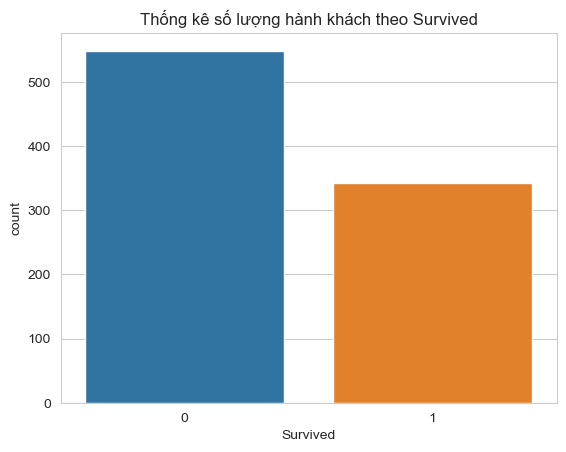

In [14]:
# Thống kê số lượng hành khách theo biến Survived
sns.set_style("whitegrid")
sns.barplot(data=titanic, x='Survived', y=titanic['Survived'].value_counts());
plt.title('Thống kê số lượng hành khách theo Survived');

Nhận xét: Đa số hành khách không sống sót sau vụ đắm tàu

### Bước 3 - Phân tích trực quan hóa dữ liệu
1. Phân tích biến Survived theo các biến định tính
- Thống kê số lượng hành khách theo Survived và Sex (giới tính)
- Thống kê số lượng hành khách theo Survived và Pclass (hạng vé)
- Thống kê số lượng hành khách theo Survived và Embarked (nơi lên tàu)
2. Phân tích biến Survived theo các biến định lượng
- Phân tích Survived theo tuổi hành khách
- Phân tích Survived theo SibSp (Số lượng anh chị em và vợ/chồng đi cùng trên tàu)
- Phân tích Survived theo Parch (Số lượng cha mẹ và con cái đi cùng trên tàu)
- Phân tích Survived theo Fare (Giá vé)

#### 3.1 Phân tích biến Survived theo các biến định tính

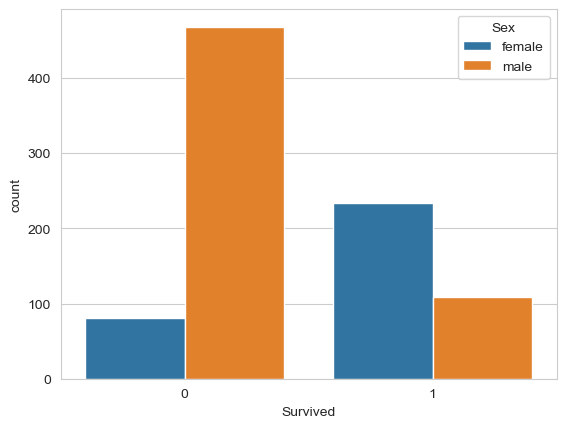

In [15]:
# Thống kê số lượng hành khách theo Survived và Sex (giới tính)
sns.countplot(data=titanic, x='Survived', hue='Sex');

Nhận xét:

Số lượng hành khách nam trên tàu lớn hơn rất nhiều so với số lượng hành khách nữ. Tuy nhiên số lượng hành khách nữ sống sót lại lớn hơn rất nhiều so với hành khách nam.

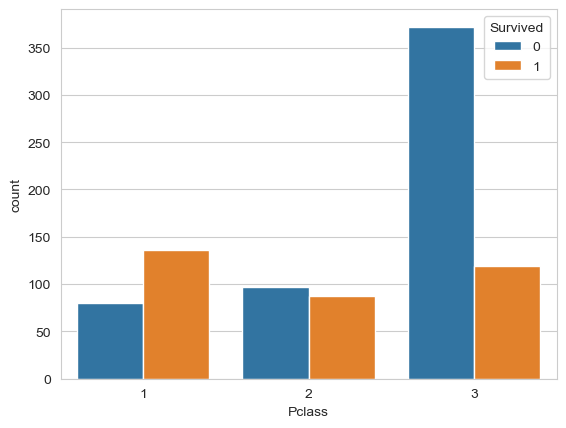

In [16]:
#Thống kê số lượng hành khách theo Survived và Pclass (hạng vé)
sns.countplot(data=titanic, x='Pclass', hue='Survived');

Nhận xét:
- Hạng vé 3 có số lượng hành khách nhiều nhất. Hành khách ở hạng vé 3 có tỷ lệ sống sót thấp hơn nhiều so với 2 hạng ghế còn lại. 
- Hành khách ở hạng vé số 1 có tỷ lệ sống sót cao nhất

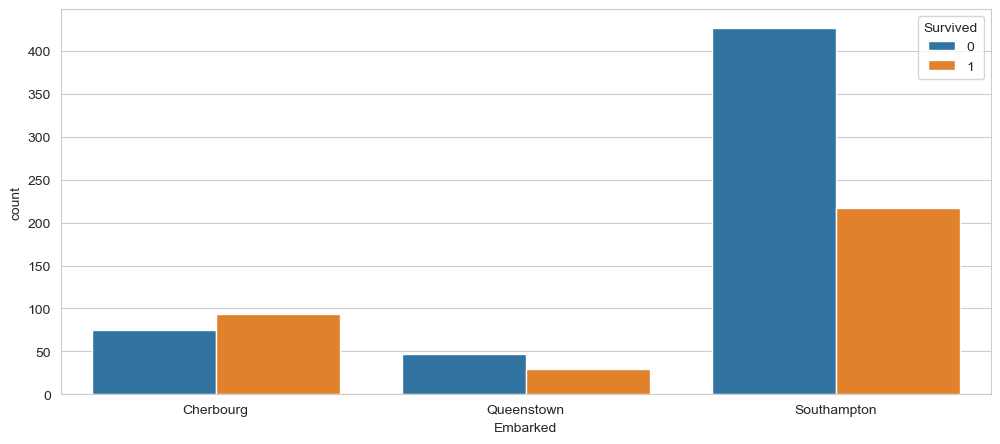

In [17]:
#Thống kê số lượng hành khách theo Survived và Embarked (nơi lên tàu)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='Embarked', hue='Survived');

Nhận xét:

Số lượng hành khách lên tàu từ cảng Southampton nhiều hơn nhiều so với 2 cảng còn lại và tỷ lệ sống sót cũng thấp hơn nhiều.

#### 3.2 Phân tích biến Survived theo các biến định lượng

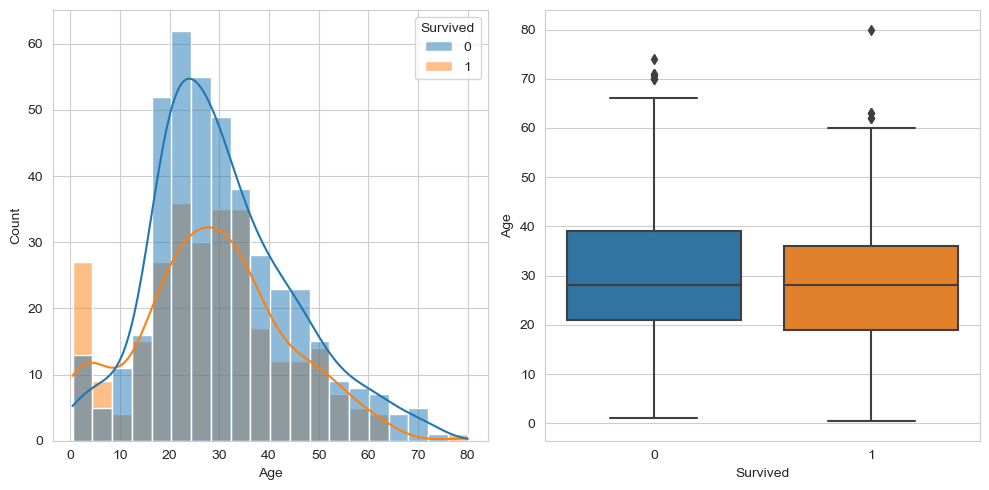

In [18]:
# Phân tích phân phối tuổi của hành khách theo Survived(vẽ histogram và boxplot trên cùng figure)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# histogram
sns.histplot(data=titanic, x='Age',hue='Survived', kde=True)

plt.subplot(1,2,2)
#boxplot
sns.boxplot(data=titanic,y='Age',x='Survived')
plt.tight_layout()
plt.show()

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 110.1+ KB


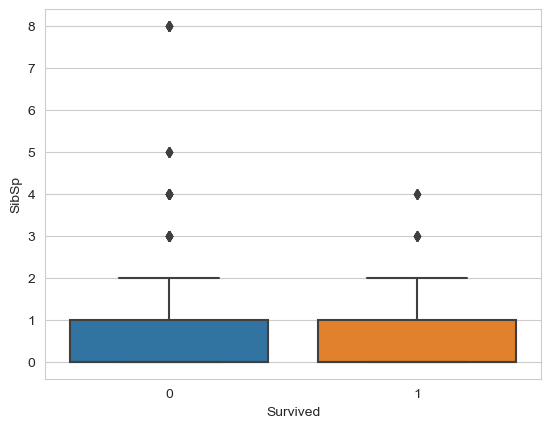

In [20]:
# Phân tích phân bố SibSp (Số lượng anh chị em và vợ/chồng đi cùng trên tàu) theo Survived
sns.boxplot(titanic, x='Survived', y='SibSp');

Nhận xét:

=> Hành khách có nhiều anh chị em đi cùng hay không đều có tỉ lệ sống sót tương đương nhau (không bị ảnh hưởng).

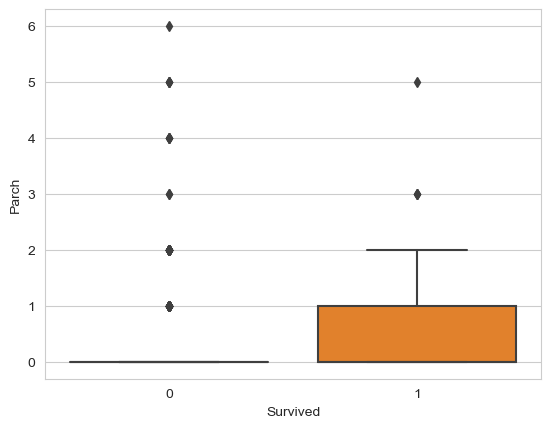

In [21]:
# Phân tích phân bố Parch (Số lượng cha mẹ và con cái đi cùng trên tàu) theo Survived
sns.boxplot(titanic, x='Survived', y='Parch');

Nhận xét:

=> Đa số hành khách sống sót có cha mẹ/ con cái đi theo cùng từ 1-2 người, hầu hết hành khách không sống sót đi 1 mình (cũng do số lượng hành khách đi 1 mình chiếm nhiều hơn)

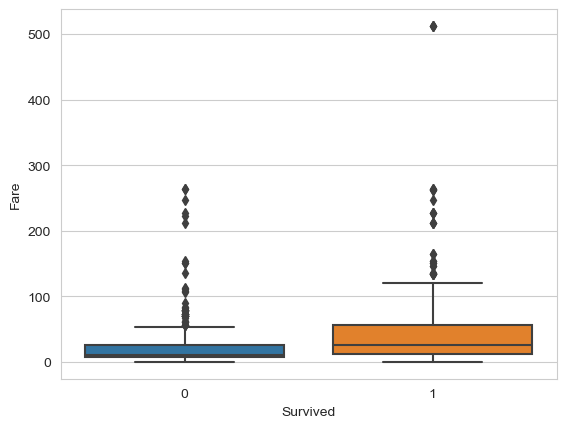

In [22]:
# Phân tích phân bố Fare (giá vé) theo Survived 
sns.boxplot(data=titanic, x='Survived', y='Fare');

Nhận xét:

=> Đa số hành khách không sống sót có giá vé thấp hơn

### Bước 4 - Phân tích trực quan hóa dữ liệu với thuộc tính mới
1. Tạo thuộc tính mới từ các biến định lượng:   
- Biến Age  
    - Tạo cột nhóm tuổi (AgeGroup) từ cột 'Age' theo quy tắc : "Trẻ em" (0-12 tuổi), "Thiếu niên" (13-18 tuổi), "Người trưởng thành" (19-50 tuổi) và "Người cao tuổi" (51 tuổi trở lên).  
- Biến 'SibSp' và 'Parch'  
    - Tạo cột kích thước gia đình trên tàu (FamilySize) (bao gồm bản thân hành khách và người thân đi cùng trên tàu: anh chị em, vợ/chồng, cha mẹ, con cái)
- Biến 'Fare'
    - Tạo cột nhóm giá vé 'FareGroup' từ cột 'Fare'  theo các khoảng giá trị ['0-dưới 25', '25-dưới 50', '50-dưới 100', '100-dưới 200', '200 trở lên'].
2. Tạo thuộc tính mới từ biến định tính:
- Biến 'Cabin'
    - Tạo thuộc tính 'CabinType', ký tự đầu tiên trong thuộc tính số hiệu Cabin, là loại Cabin tương ứng với vị trí cabin trên tàu theo hình minh họa sau (nếu hành khách không có số hiệu cabin, tức là phòng ngủ riêng, giá trị của thuộc tính CabinType sẽ  là 'No')
    
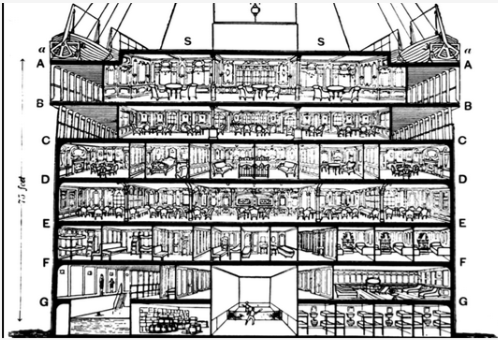    

3. Phân tích trực quan hóa dữ liệu với thuộc tính mới
- Thống kê số lượng hành khách theo Survived và AgeGroup (nhóm tuổi)
- Thống kê số lượng hành khách theo Survived và FamilySize (kích thước gia đình)
- Thống kê số lượng hành khách theo Survived và FareGroup (nhóm giá vé)
- Thống kê số lượng hành khách theo Survived và CabinType  

#### 4.1 Tạo thuộc tính mới từ các biến định lượng:

In [23]:
# Tạo nhóm tuổi 'AgeGroup' từ cột 'Age'
titanic.loc[(titanic['Age']>=0) & (titanic['Age']<=12),'AgeGroup']='Trẻ em'
titanic.loc[(titanic['Age']>=13) & (titanic['Age']<=18),'AgeGroup']='Thiếu niên'
titanic.loc[(titanic['Age']>=19) & (titanic['Age']<=50),'AgeGroup']='Người trưởng thành'
titanic.loc[(titanic['Age']>=51),'AgeGroup']='Người cao tuổi'
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Người trưởng thành
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Người trưởng thành
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Người trưởng thành
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Người trưởng thành
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Người trưởng thành


In [24]:
# Tạo thuộc tính 'FamilySize' là kích thước gia đình trên tàu
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Người trưởng thành,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Người trưởng thành,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Người trưởng thành,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Người trưởng thành,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Người trưởng thành,0


In [25]:
# Tạo nhóm giá vé 'FareGroup' từ cột 'Fare'
#['0-dưới 25', '25-dưới 50', '50-dưới 100', '100-dưới 200', '200 trở lên']
titanic.loc[titanic['Fare']<25, 'FareGroup']='0-dưới 25'
titanic.loc[(titanic['Fare']>=25) & (titanic['Fare']<50), 'FareGroup']='25-dưới 50'
titanic.loc[(titanic['Fare']>=50) & (titanic['Fare']<100), 'FareGroup']='100-dưới 200'
titanic.loc[(titanic['Fare']>=100) & (titanic['Fare']<200), 'FareGroup']='200 trở lên'
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Người trưởng thành,1,0-dưới 25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Người trưởng thành,1,100-dưới 200
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Người trưởng thành,0,0-dưới 25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Người trưởng thành,1,100-dưới 200
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Người trưởng thành,0,0-dưới 25


#### 4.2 Tạo thuộc tính mới từ biến định tính:

In [26]:
# Tạo thuộc tính 'CabinType' là loại Cabin
titanic['CabinType']=titanic['Cabin'].str.extract('(\w){1}\d{2}')
titanic.loc[titanic['CabinType'].isnull(), 'CabinType']='No'
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FareGroup,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Người trưởng thành,1,0-dưới 25,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Người trưởng thành,1,100-dưới 200,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Người trưởng thành,0,0-dưới 25,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Người trưởng thành,1,100-dưới 200,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Người trưởng thành,0,0-dưới 25,No


In [27]:
# Đếm số hành khách theo CabinType
titanic['CabinType'].value_counts()

CabinType
No    715
C      56
B      43
E      31
D      27
A      12
F       4
G       3
Name: count, dtype: int64

In [28]:
# Trên tàu Titanic không có Cabin T (sai sót trong nhập liệu). Cập nhật CabinType T thành "No"

#### 4.3 Phân tích trực quan hóa dữ liệu với thuộc tính mới

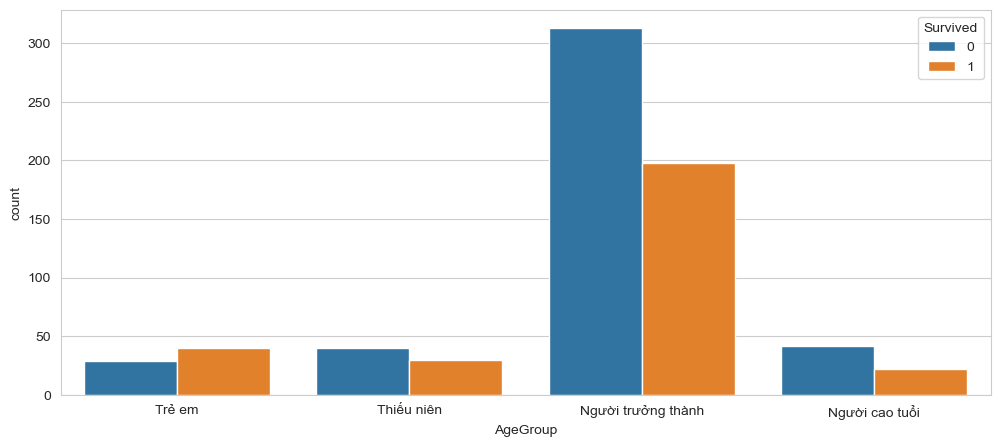

In [33]:
# Thống kê số lượng hành khách theo Survived và AgeGroup (nhóm tuổi)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='AgeGroup', hue='Survived', order=['Trẻ em', 'Thiếu niên', 'Người trưởng thành', 'Người cao tuổi'] );

Nhận xét:
- Đa số hành khách trên tàu ở độ tuổi trưởng thành.
- Trẻ em (0-12 tuổi): Tỷ lệ sống sót cao hơn so với tử vong. Điều này cho thấy trẻ em được ưu tiên cứu trợ. 
- Thiếu niên (13-18 tuổi): Tỷ lệ tử vong hơi cao hơn so với tỷ lệ sống sót, nhưng không chênh lệch quá nhiều. 
- Người trưởng thành (19-50 tuổi): Tổng số lượng hành khách trong nhóm này là lớn nhất, và tỷ lệ tử vong cũng cao hơn tỷ lệ sống sót.
- Người cao tuổi (51 tuổi trở lên): Tỷ lệ sống sót thấp hơn so với tỷ lệ tử vong, cho thấy người già có khả năng sống sót thấp hơn.

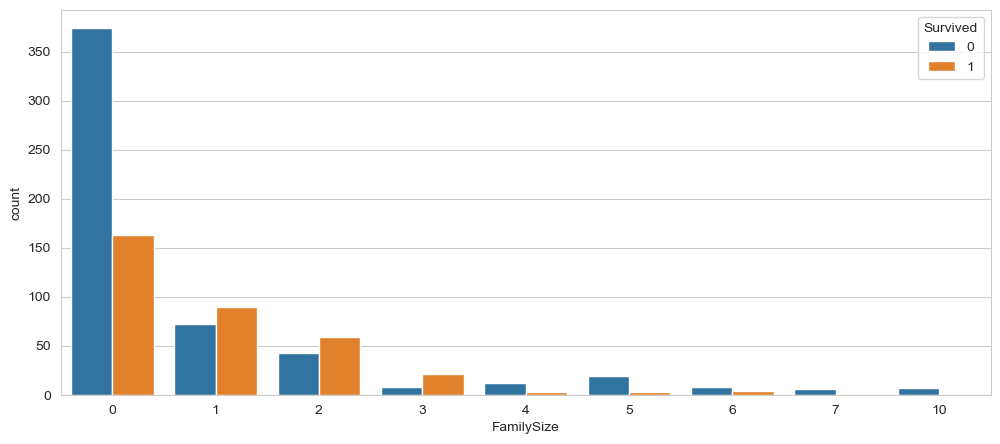

In [34]:
# Thống kê số lượng hành khách theo Survived và FamilySize (kích thước gia đình)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='FamilySize', hue='Survived');

Nhận xét:

- Đa số các hành khách đi 1 mình hoặc đi cùng gia đình (nhưng ít thành viên). 
- Hành khách đi một mình (kích thước gia đình = 1): Có số lượng lớn nhất và tỷ lệ sống sót thấp hơn so với tử vong. 
- Hành khách đi với 2-4 người trong gia đình: Có tỷ lệ sống sót cao hơn so với những hành khách đi một mình hoặc những gia đình lớn hơn.
- Hành khách đi với 5 người trở lên trong gia đình: Tỉ lệ sống sót giảm đáng kể. Điều này có thể do việc cứu trợ trở nên khó khăn hơn khi có nhiều thành viên trong gia đình.

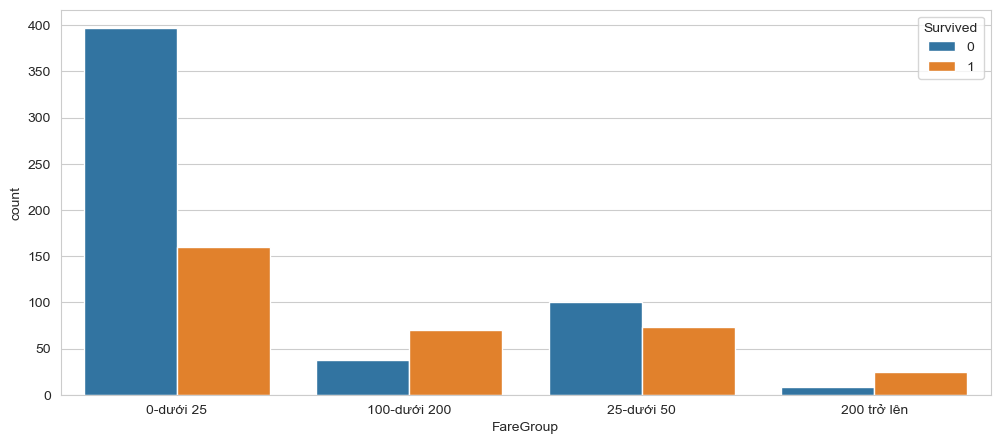

In [35]:
# Thống kê số lượng hành khách theo Survived và FareGroup (nhóm giá vé)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='FareGroup', hue='Survived');

Nhận xét:

Phần lớn các hành khách đi trên tàu mua vé giá rẻ từ 0-25 USD nhưng tỷ lệ hành khách không sống sót/ sống sót của nhóm này cũng lớn hơn nhiều so với các nhóm khác. 

=> Điều này cho thấy hành khách có giá vé cao hơn có khả năng sống sót cao hơn, có thể vì họ được ưu tiên cứu trợ hoặc ở những vị trí an toàn hơn trên tàu.

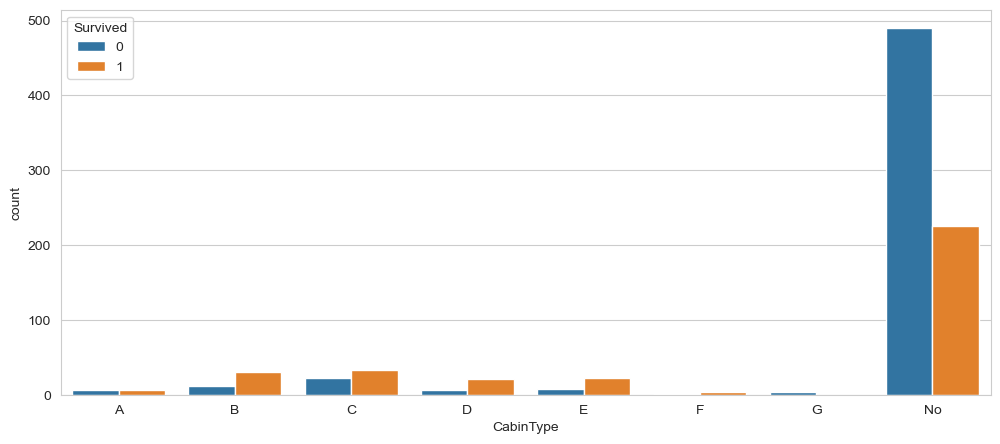

In [36]:
# Thống kê số lượng hành khách theo Survived và CabinType (loại Cabin)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='CabinType', hue='Survived', order=['A', 'B', 'C','D','E', 'F', 'G', 'No']);

Nhận xét: 
- Phần lớn vé trên tàu thuộc loại không có cabin (và là vé giá rẻ). Số lượng và tỷ lệ hành khách không sống sót/ sống sót của nhóm này cũng lớn hơn nhiều so với các nhóm khác.
- Phòng loại B, C, D, E có tỷ lệ sống sót cao hơn rất nhiều so với tỷ lệ tử vong. 
- Phòng loại F có tỷ lệ sống sót cao hơn không nhiều so với tỷ lệ tử vong.
- Phòng loại A, G có tỷ lệ sống sót hoặc tử vong tương đương nhau.
- Chỉ có 1 hành khách ở cabin loại T (tử vong).

Như vậy, rất có thể hành khách ở phòng loại B, C, D, E có tỷ lệ sống sót cao vì vị trí tầng của vé ngồi gần với mực nước biển, có thể đi đến tàu cứu hộ nhanh hơn.

### Bước 5 - Phân tích biến Survived với kết hợp giữa 2 biến định tính
1. Phân tích biến Survived theo Pclass (hạng vé) và Sex (giới tính)
2. Phân tích biến Survived theo AgeGroup (nhóm tuổi) và Sex (giới tính)

#### 5.1 Phân tích biến Survived theo Pclass và Sex

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


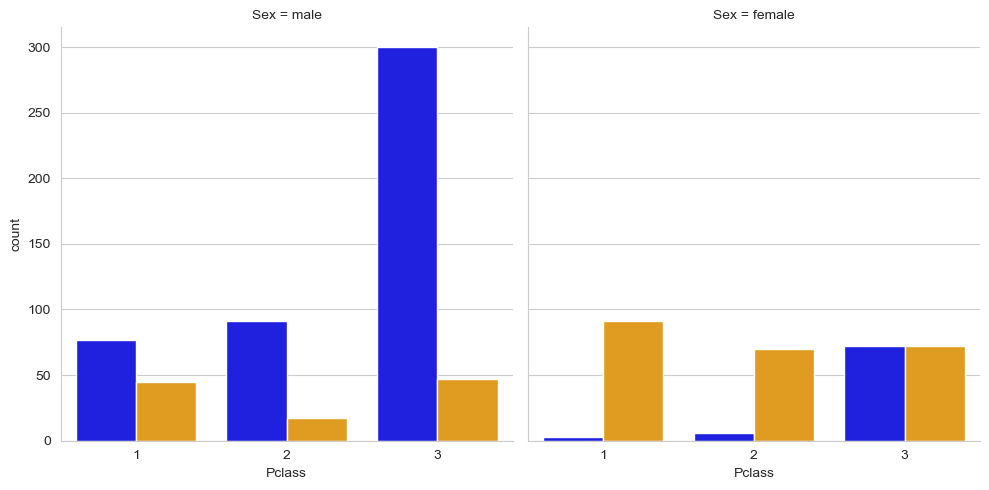

In [54]:
# Thống kê số lượng hành khách theo Pclass, Sex và Survived
f=sns.FacetGrid(titanic, col='Sex', col_order=['male','female'], height=5 );
f.map_dataframe(sns.countplot,'Pclass', hue='Survived', palette={0: "blue", 1: "orange"});

Nhận xét:
- Nam: 
    - Hạng nhất (Pclass 1): Tỷ lệ sống sót cao hơn so với các hạng vé khác nhưng vẫn thấp so với tỷ lệ tử vong. 
    - Hạng hai (Pclass 2) và Hạng ba (Pclass 3): Tỷ lệ tử vong rất cao. 
- Nữ:
    - Hạng nhất (Pclass 1) và Hạng hai (Pclass 2): Tỷ lệ sống sót rất cao, đặc biệt là trong hạng nhất. 
    - Hạng ba (Pclass 3): Tỷ lệ sống sót và tử vong gần như tương đương, với tỷ lệ tử vong hơi cao hơn một chút.

=> Như vậy, giới tính và hạng vé đều ảnh hưởng đến tỷ lệ sống sót của hành khách trên tàu Titanic. Và trong cùng 1 hạng vé thì tỉ lệ nữ giới sống sót cao hơn nam giới có thể là do phụ nữ được ưu tiên giải cứu.

#### 5.2 Phân tích biến Survived theo AgeGroup (nhóm tuổi) và Sex (giới tính)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


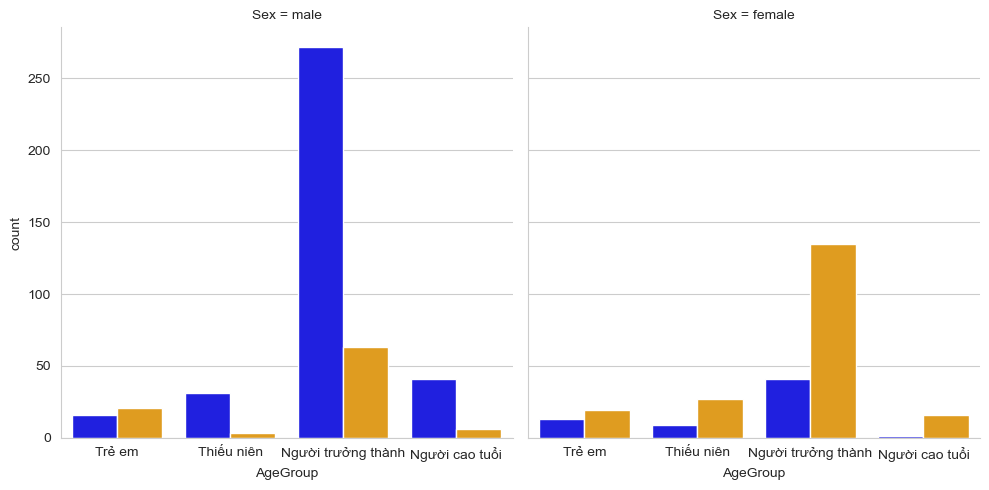

In [59]:
# Thống kê số lượng hành khách theo AgeGroup, Sex và Survived 
f1=sns.FacetGrid(titanic, col='Sex', col_order=['male','female'], height=5)
f1.map_dataframe(sns.countplot, 'AgeGroup', hue='Survived', palette={0: "blue", 1: "orange"}, order=['Trẻ em', 'Thiếu niên', 'Người trưởng thành', 'Người cao tuổi']);

Nhận xét:

Ở mọi lứa tuổi, tỷ lệ sống sót của nữ giới luôn cao hơn. 
Đặc biệt đối với nhóm người trưởng thành, tỷ lệ sống sót của nam giới rất thấp so với nam giới không sống sót ở cùng nhóm tuổi. 

----


### Dựa trên các thống kê về thảm họa chìm tàu Titanic, ta có thể rút ra một số kết luận về yếu tố ảnh hưởng đến khả năng sống sót của các hành khách trên tàu.
Theo tổng quan, số lượng hành khách KHÔNG sống sót cao hơn so với hành khách còn sống. 

#### Phụ nữ có khả năng sống sót cao hơn: 
Dữ liệu cho thấy tỷ lệ sống sót của phụ nữ cao hơn nhiều so với nam giới. Điều này có thể được giải thích bởi việc ưu tiên phụ nữ và trẻ em được giải cứu trước. 
#### Hành khách ở các hạng vé cao hơn có tỷ lệ sống sót cao hơn: 
Hành khách ở hạng vé thứ nhất có tỷ lệ sống sót cao nhất, tiếp theo là hạng vé thứ hai và sau cùng là hạng vé thứ ba. Điều này có thể phản ánh việc được ưu tiên sử dụng các khu vực tiện ích như phòng thoát hiểm, thuyền cứu sinh và cầu thang, và vị trí của các phòng ngủ đặt ở phần trên của tàu, gần với mặt nước.
#### Trẻ em có tỷ lệ sống sót cao hơn:
Khi phân tích theo các nhóm tuổi, trẻ em (đặc biệt là những người dưới 12 tuổi) có tỷ lệ sống sót cao hơn so với người lớn và người cao tuổi. Một lần nữa, điều này có thể do việc ưu tiên sơ tán cho trẻ em.
#### Gia đình nhỏ có tỷ lệ sống sót cao hơn: 
Các cá nhân đi tàu một mình hoặc cùng gia đình nhỏ (2-4 thành viên) có cơ hội sống sót cao hơn so với những người đi cùng gia đình lớn. Gia đình lớn có thể đối mặt với những thách thức trong quá trình sơ tán, chẳng hạn như phối hợp giữa các thành viên hoặc việc tìm kiếm lẫn nhau.
#### Giá vé cao tương quan với tỷ lệ sống sót cao hơn: 
Hành khách trả giá vé cao hơn, thường tương quan với các hạng vé cao hơn, có tỷ lệ sống sót tốt hơn. Điều này có thể do vị trí phòng ngủ tốt hơn, quyền tiếp cận tốt hơn tới thuyền cứu sinh hoặc các đặc quyền liên quan đến vé giá cao.